#Projeto Interativo: Classificação de Vinhos com Scikit-Learn

O que é Classificação Não Supervisionada?
É quando você não tem os rótulos (classes) dos dados e quer descobrir agrupamentos naturais. No caso do dataset Iris, mesmo que ele tenha rótulos (setosa, versicolor, virginica), você pode ignorá-los e tentar descobrir esses grupos com base nas características das flores.

Aplicar o algoritmo KMeans para agrupar os vinhos com base em suas características químicas, avaliando a qualidade dos agrupamentos com:
- Método do Cotovelo
- Silhouette Score
- Matriz de correlação
- PCA para visualização
- ARI para comparar com os rótulos reais (apenas para fins didáticos


#Carregar o dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Carregar e explorar os dados

In [ ]:
# Carregar o dataset Wine
wine = datasets.load_wine()
X = wine.data
y_true = wine.target  # rótulos reais: 0, 1, 2

# Transformar em DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df['label'] = y_true

# Visualizar as primeiras linhas
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


##Matriz de correlação entre atributos

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


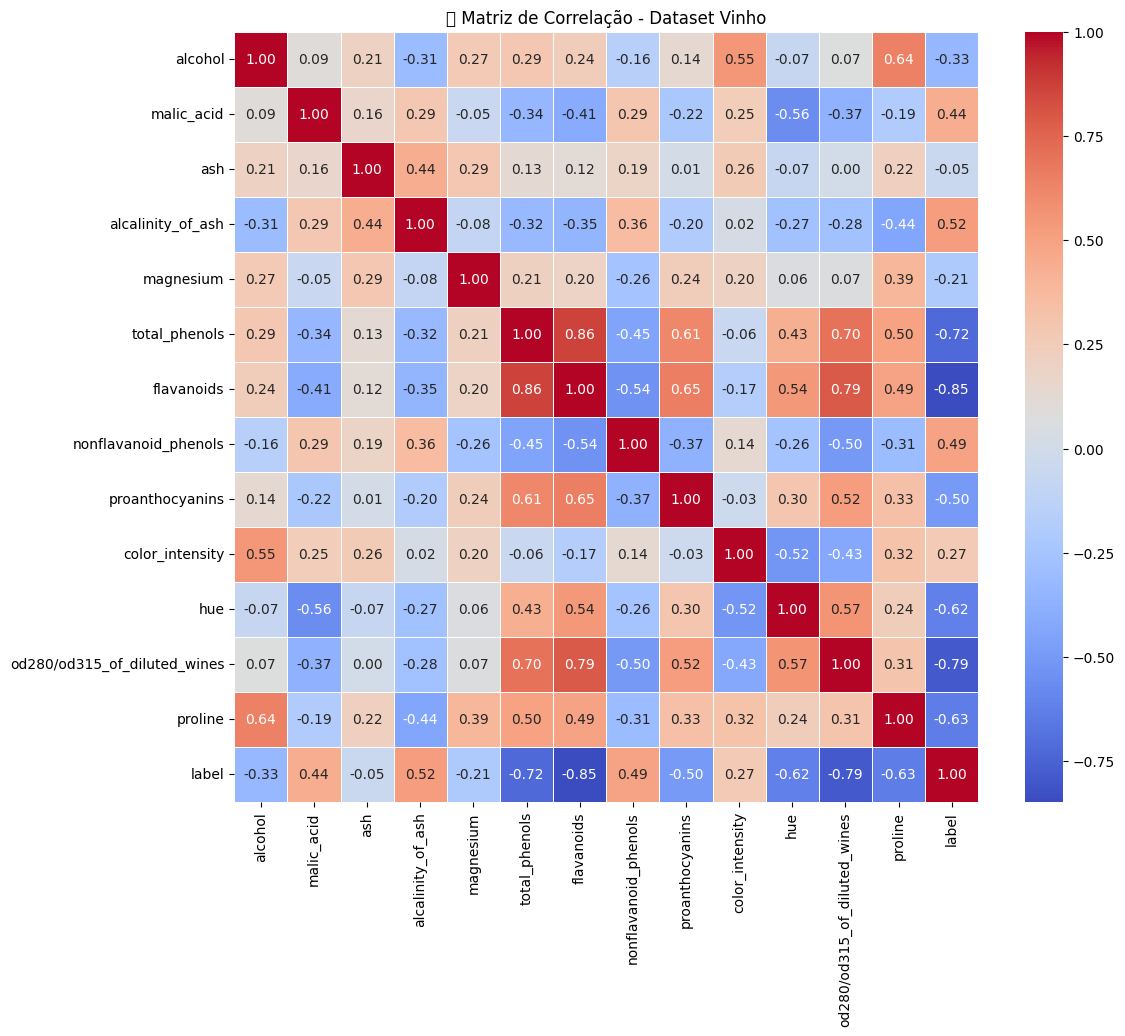

In [ ]:
# Visualizar com heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('🔗 Matriz de Correlação - Dataset Vinho')
plt.show()

## Normalização e PCA para visualização

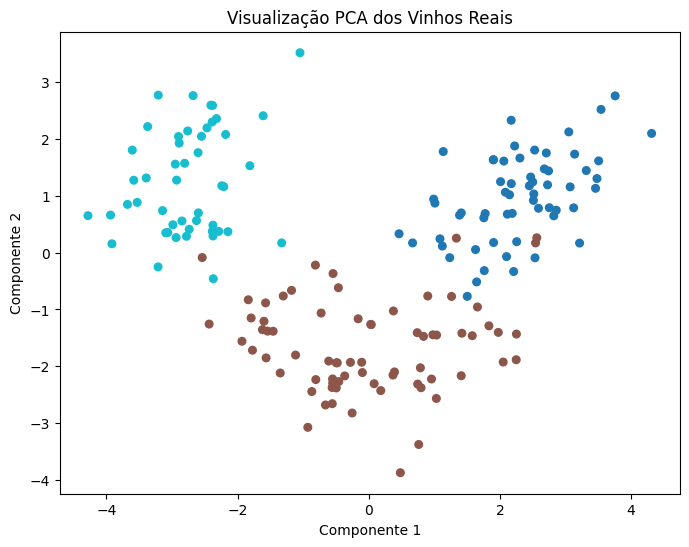

In [ ]:
# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduzir para 2 dimensões com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os dados reais com PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_true, cmap='tab10', s=30)
plt.title("Visualização PCA dos Vinhos Reais")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

Método do Cotovelo e Silhouette Score - O melhor valor de k geralmente está onde a inércia começa a diminuir lentamente e o Silhouette Score é alto. Para o Wine, o ideal costuma ser k = 3.

Método do Cotovelo
- Avalia a inércia (compactação dos clusters).
- À medida que aumentamos o número de clusters (k), a inércia diminui.
- O ponto ideal é onde a curva "faz um cotovelo", indicando que aumentar k não melhora muito o agrupamento.
- No dataset Wine, o cotovelo aparece em k = 3, sugerindo que 3 grupos são suficientes.

Silhouette Score
- Mede o quão bem separados estão os clusters.
- Varia de -1 a 1: quanto mais próximo de 1, melhor.
- No exemplo, o Silhouette Score também é mais alto em k = 3, confirmando que essa é a melhor escolha.

Conclusão
Ambos os métodos apontam para k = 3, que coincide com as 3 classes reais do dataset Wine. Isso mostra que o KMeans conseguiu identificar bem os grupos, mesmo sem saber os rótulos.



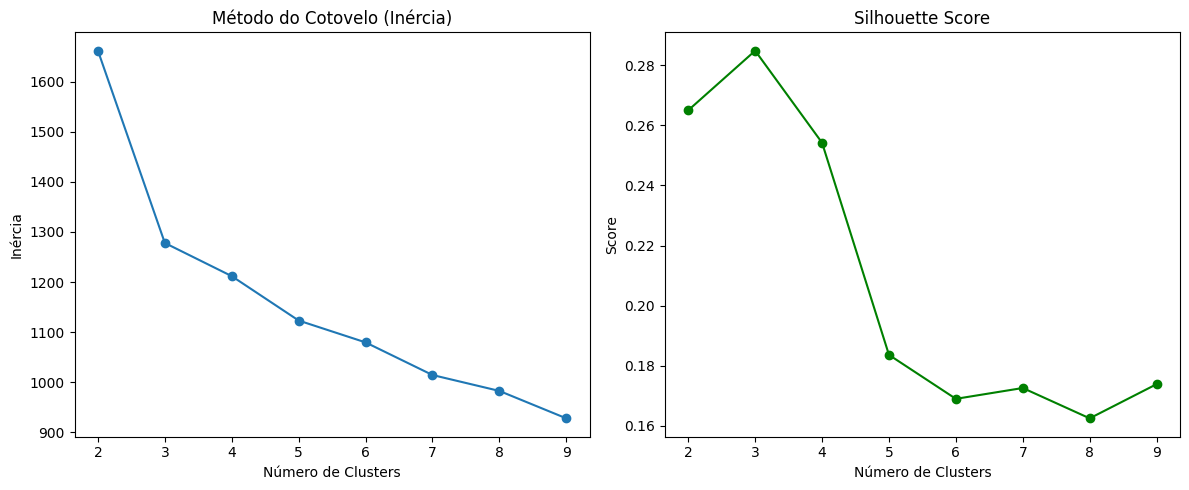

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k_range = range(2, 10)
inertia = []
silhouette = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12,5))

# Inércia
plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker='o')
plt.title("Método do Cotovelo (Inércia)")
plt.xlabel("Número de Clusters")
plt.ylabel("Inércia")

# Silhouette Score
plt.subplot(1,2,2)
plt.plot(k_range, silhouette, marker='o', color='green')
plt.title("Silhouette Score")
plt.xlabel("Número de Clusters")
plt.ylabel("Score")

plt.tight_layout()
plt.show()

## Aplicar KMeans com o melhor número de clusters

In [ ]:
# Aplicar KMeans com k=3
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

## Avaliação de modelos - O ARI mostra o quão próximo o agrupamento está dos rótulos reais (mesmo sem supervisionamento). O Silhouette Score mostra a separação entre os grupos.

In [ ]:
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(y_true, labels_kmeans)
sil = silhouette_score(X_scaled, labels_kmeans)

print(f"KMeans com k={k_optimal}")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Silhouette Score: {sil:.3f}")

KMeans com k=3
Adjusted Rand Index (ARI): 0.897
Silhouette Score: 0.285


## Visualização dos clusters gerados

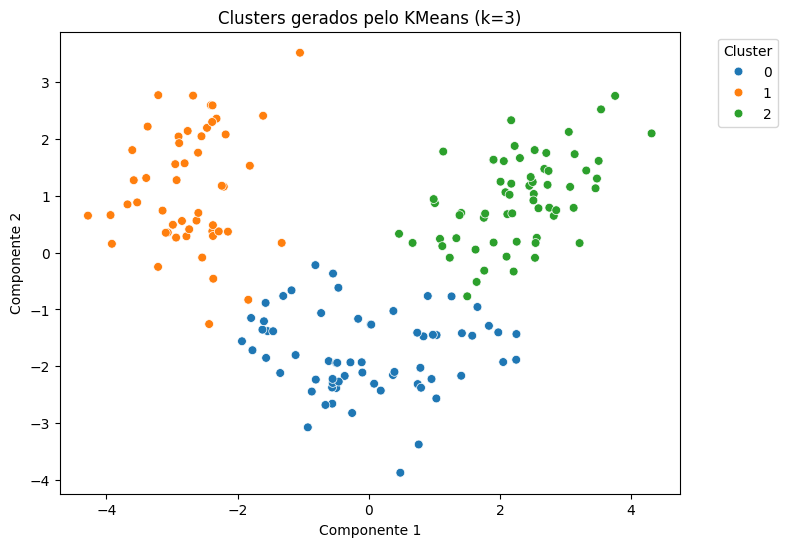

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_kmeans, palette='tab10', s=40)
plt.title(f"Clusters gerados pelo KMeans (k={k_optimal})")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Resumo final
- O KMeans conseguiu agrupar os vinhos em 3 grupos distintos.
- O método do cotovelo e o Silhouette Score ajudaram a escolher o melhor número de clusters.
- O ARI mostrou que os agrupamentos se aproximam dos rótulos reais, mesmo sem supervisão.